# AutoBoT

1. Executa Aplicações BoT sujeitas a um deadline
2. O algoritmo é divido em duas etapas: 1) estático e 2) dinâmico
3. Considera o histórico de preços e o bid do mercado spot
4. Não considera Hibernação e VMs Burstable
5. O artigo apresenta apenas avaliações simuladas
6. Ambientes homogêneos a nível de mercado (apenas um tipo de spot VM e apenas um tipo de on-demand)
7. A etapa mais complicada e importante é a criaçao do mapa inicial



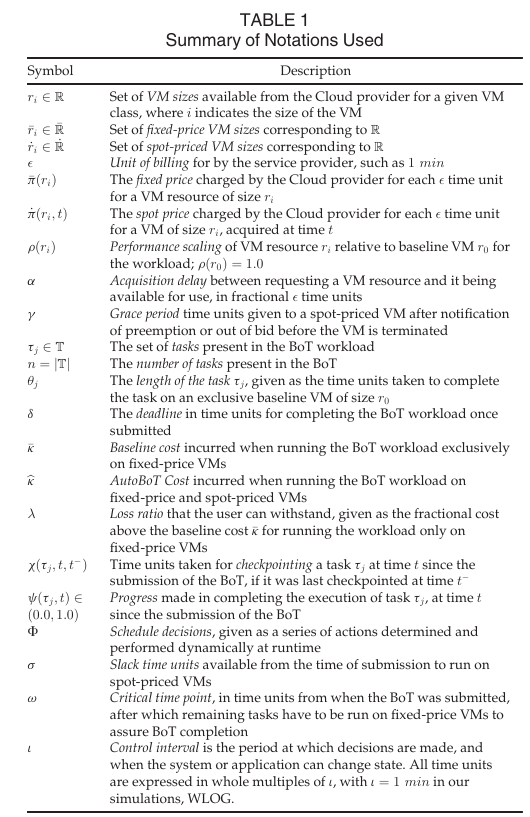


## Static Scheduling (Initial Map)

_Input:_
- BoT aplication
- Deadline $\delta$ 
- _loss ratio_ $\lambda$
- Baseline cost, $\bar{k}$ of executed exclusively in on-demand VM (Authors show how to compute that)

_Objective:_ Minimize $\hat{k}$, Total cost of the execution

_Subject to:_ 

1. __Deadline__ $\delta$
2. __Loss Minimization:__ $\frac{\hat{k}-\bar{k}}{\bar{k}} < \lambda$, i.e.,  the cost paid for the on-demand and spot VMs using their solution ($\hat{k}$) should not be greater than a given loss ratio $\lambda > 0$ above the baseline cost $\bar{k}$




They perform a parameter sweep to find the suitable _slack period_ available for different numbers of spot and on-demand VMs that meet the _loss budget_. Based on this, they perform the initial assignment of tasks to the spot VMs instances

In other words, they exploit the user-defined _loss budget_ to opportunistically run tasks on spot VMs. Specifically, they have a _loss budget_ of ($\lambda \times \bar{k}$) as the upper bound when determining the output parameters below




### STEP #1: Parameter sweep

- $\sigma$ time units,  the slack period to run the tasks on spot VMs;
- $s$, the number of spot VMs that can be used to schedule the tasks during $\sigma$; 
- $f$, the number of on-demand VMs required to run all tasks within ($\delta - \sigma$) time units, where $\delta$ is the deadline


They perform a parameter space exploration for all discrete values of $f$ and $\sigma$ such that $0 \leq \sigma < \delta$ and $1 \leq f \leq n$  
 
__They look for maximize the slack time to allow more time for tasks to execute on spot VMs while staying within the loss budget__


Thus for each pair $<\sigma_i, f_j>$ they perform following tests to find a valid set:

1. We check if all $n$ tasks can be packed on $f_j$ on-demand VMs with the __best performance__, $r_{max} = r_i \in \mathbb{R} | max_ip(r_i)$, with the capacity of each VM being ($\delta - \alpha - \sigma_i$), where $\alpha$ is the startup time.

    1. perform a best-fit bin-packing of tasks onto the static set of VMs, in descending order of task execution times. 
    
    2. Since they wish to minimize the number of on-demand VMs, they prune the search space for a given $\sigma_i$ by not exploring values of $f_k > f_j$ if we can successfully pack the tasks in $f_j$ VMs. If the packing is not successful, move to the next pair of $<\sigma_i, f_j>$ values
    
    
    
    
2. Compute the on-demand VMs cost for running all tasks on these $r_{max}$ sized VMs
 
   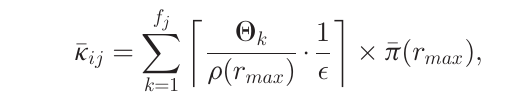
   where $\Theta_k = \sum{\theta_l | \tau_l \rightarrow \bar{v}_k }$ is the total execution time for all tasks that have been mapped to the On-demand VM $\bar{v}_k$, $p(r_{max})$ is the performance scaling of VM $r_{max}$, $\epsilon$ is the unit of billing and $\bar{\pi}(r_{max})$ is the price of the on-demand VMs. 
   
   __They also compute the _excess cost_ as:__ 
   
   $x_{ij} = \bar{K}_{ij} - \bar{k}$, where $\bar{k}$ is the baseline cost, i.e, the best cost we can expect to pay when using only on-demand VMs.

   

3.  Given these on-demand VMs, they calculate the loss budget available to run spot  VMs as $\hat{k}_{ij} = (\lambda \times \bar{k}) - \bar{K}_{ij}$
    1. If  $\hat{k}_{ij} > 0$, they compute the number of expected spot VMs cores $c_{ij}$  that can be afford with the loss budget. __Note: they consider the spot price history to compute that__
    

### STEP #2: Pair Selection $<\sigma_i, f_j>$

Once they have a valid set of $<\sigma_i, f_j>$ pairs on which a viable solution exists using on-demand VMs after the critical point, they select __one solution__ where the excess cost $x_{ij}$ is small, the expected spot cores ($c_{ij}$) is fewer, and the slack period ($\sigma_i$) is long:

1. Sort the pairs $<\sigma_i, f_j>$ in ascending order of ($x_{ij} + c_{ij}$); 
2. and then in descending order of $\sigma_i$. 

### STEP #3: Spot VMs Selection

1. Select the spot VM $r_k$ with the highest performance $p(r_k)$ 
2. Compute the number of spot VMs can be afford $s_{ij} = \lfloor \frac{c_{ij}}{p(r_k)}\rfloor$
3. Test if the slack time allows at least one task in the BoT to complete on each of the spot instances in a perfect scenario (without spot revocation)
    1. sort the tasks in the BoT in ascending order of execution time
    2. Check if $\frac{\Theta_s}{p(r_k)}  \leq (\sigma_i - \alpha)$ to ensure that the $s_{ij}$ smallest task, can complete on the selected spot VM size within the slack period. __Else, go to the next $<\sigma_i, f_j>$__


##### At the end of this heuristic we have:

1. The number of on-demand VMs $f^{'}$ of size $r_{max}$;
2. The number of spot VMs $s^{'}$ of size $r^{'}$;
3. Slack time $\sigma^{'}$ available for the spot VMs, which is also the critical point $\omega$ after they switch to on-demand VMs.

They map the $n$ tasks to the $s^{'}$ spot VMs, each with a time capacity of $\sigma^{'} - \alpha$ using the _balanced-fit greedy algorithm_ applied to the tasks that are sorted in a descending order of execution time.   

Note: It is possible that a task in the BoT is not assigned to a spot VM as their heuristic only ensures at least one task per VM. These tasks will directly run on the fixed-price VMs.

# Some Figures

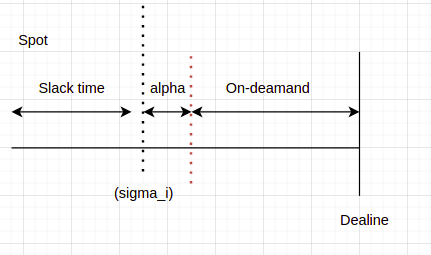

# Notas da reunião

1. Verificar qual foi a melhor estrategia de checkpoint de acordo com os resultados do paper